# 1. 강의영상 

{{<video ???? >}}

# 2. Imports

In [1]:
#!pip install autogluon.eda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/weightloss.csv')
df_train

,Supplement,Exercise,Weight_Loss
0,False,False,-0.877103
1,True,False,1.604542
2,True,True,13.824148
3,True,True,13.004505
4,True,True,13.701128
...,...,...,...
9995,True,False,1.558841
9996,False,False,-0.217816
9997,False,True,4.072701
9998,True,False,-0.253796


# 4. 적합 

In [4]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'Weight_Loss')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_133447/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231130_133447/"
AutoGluon Version:  0.8.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1584.95 GB / 1887.51 GB (84.0%)
Train Data Rows:    10000
Train Data Columns: 2
Label Column: Weight_Loss
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (18.725299456466026, -3.4848875790233675, 5.11908, 6.09267)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitti

# 5. 해석 및 시각화 

## A. y의 분포, (X,y)의 관계 시각화 

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
Weight_Loss,10000,5.11908,6.092669,-3.484888,0.277797,2.683447,12.075458,18.725299,float64,10000,,,float,


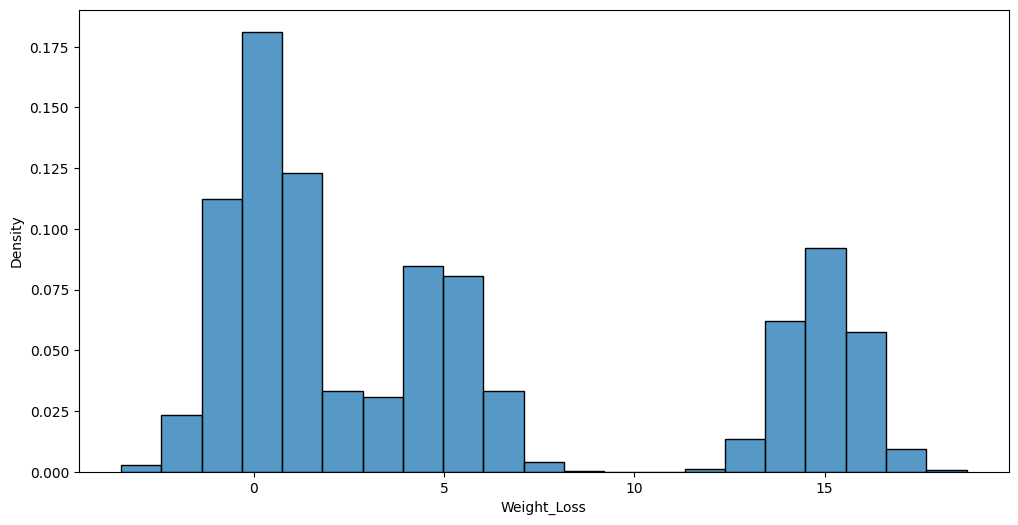

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `Weight_Loss` >= `0.5`**

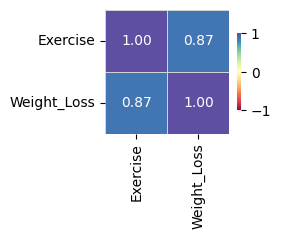

**Feature interaction between `Exercise`/`Weight_Loss` in `train_data`**

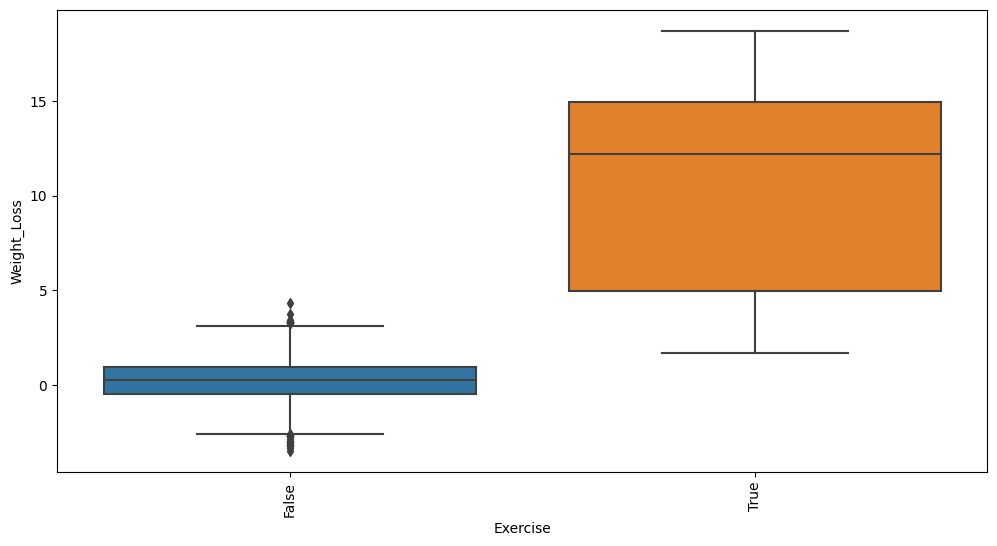

In [5]:
auto.target_analysis(
    train_data=df_train, 
    label='Weight_Loss',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_133535/"


### Model Prediction for Weight_Loss

Using validation data for `Test` points

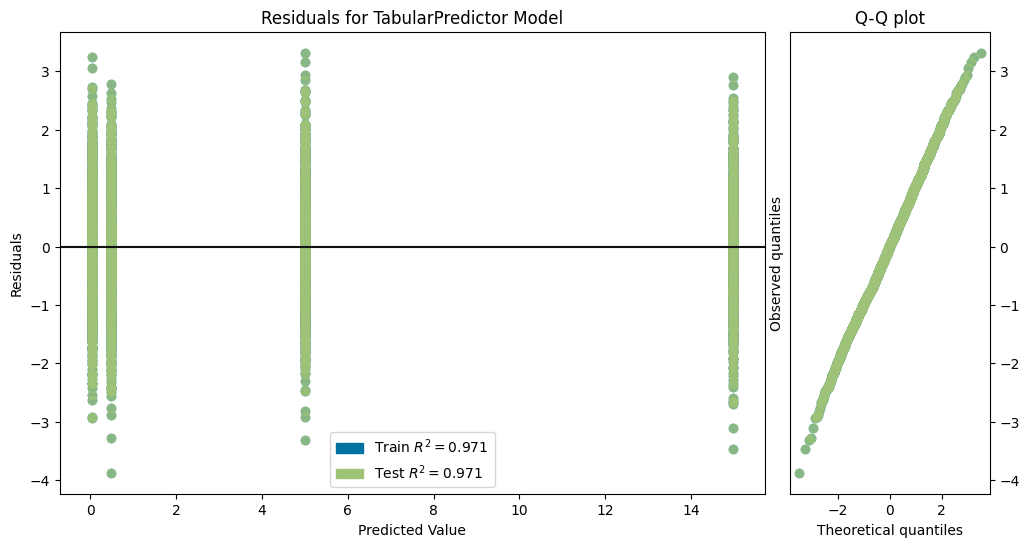

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-1.013205,-0.973093,0.005269,0.001751,0.840761,0.005269,0.001751,0.840761,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
Exercise,6.735479,0.105037,7.094759e-09,5,6.951752,6.519206
Supplement,4.018616,0.073537,1.344948e-08,5,4.170030,3.867202


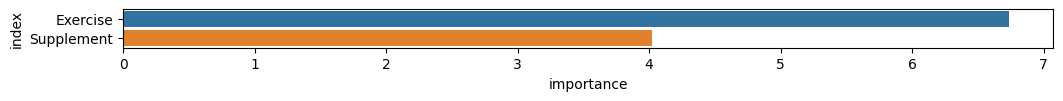

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,Supplement,Exercise,Weight_Loss,Weight_Loss_pred,error
4639,True,False,4.358143,0.484748,3.873395
1683,True,True,18.432093,14.966088,3.466005
1275,False,True,1.693150,5.012056,3.318906
2631,False,True,8.328789,5.012056,3.316733
5334,True,False,3.769029,0.484748,3.284281
3437,False,False,-3.205225,0.039978,3.245204
2761,False,True,1.853100,5.012056,3.158956
9675,True,True,18.070419,14.966088,3.104331
3161,False,False,-3.020254,0.039978,3.060232
4637,False,True,2.077349,5.012056,2.934706


In [7]:
auto.quick_fit(
    train_data = df_train, 
    label='Weight_Loss',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석 

In [8]:
predictr.predict(df_train.iloc[[1]])

1    0.55076
Name: Weight_Loss, dtype: float32

,Supplement,Exercise,Weight_Loss
1,1.0,0.0,1.604542


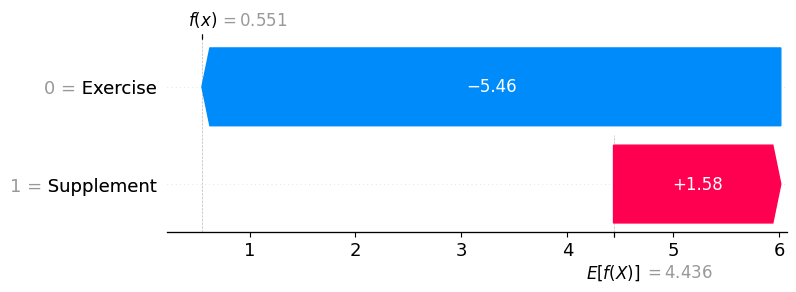

In [9]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[1]]*1
)